# Estimación de parámetros 

![](https://www.iconfinder.com/data/icons/education-120/52/Diana_Target_Commerce_Sport_Dart_Center_Nailed_Business-128.png)

Para estimar el valor de un parámetro poblacional, se puede usar información de la
muestra en la forma de un estimador. Los estimadores se calculan usando información
de las observaciones muestrales y, en consecuencia, por definición son también estadísticas.

Los estimadores se usan en dos formas diferentes:
- **Estimación puntual:** Con base en datos muestrales, se calcula un solo número para estimar el parámetro poblacional. La regla o fórmula que describe este cálculo se denomina estimador puntual y el número resultante recibe el nombre de estimación puntual.

- **Estimación de intervalo:** Con base en datos muestrales, dos números se calculan para formar un intervalo dentro del cual se espera esté el parámetro. La regla o fórmula que describe este cálculo se denomina estimador de intervalo y el par de números resultantes se llama estimación de intervalo o intervalo de confianza


## Estimación por Intervalo

![](https://www.iconfinder.com/data/icons/financial-diagrams-1/100/interval-128.png)

Un estimador de intervalo es una regla para calcular dos números, por ejemplo a y b,
para crear un intervalo del que usted está completamente seguro que contiene el parámetro de interés. El concepto de “completamente seguro” significa “con gran probabilidad”. Medimos esta probabilidad usando el **coeficiente de confianza**, designado por  $1-\alpha$

### Intervalo de confianza de muestra grande para una media poblacional $\mu$

![](https://www.iconfinder.com/data/icons/internet-marketing-dazzle-vol-1/256/Average_Position_-128.png)

Cuando el tamaño muestral $n$ sea grande, la media muestral $\bar{X}$ es el mejor estimador puntual para la media poblacional $\mu$. Como su distribución muestral es aproximadamente normal, puede usarse para construir un intervalo de confianza de acuerdo con el método siguiente.

***UN INTERVALO DE CONFIANZA DE MUESTRA
GRANDE $(1 -\alpha)100\%$ PARA UNA MEDIA
POBLACIONAL $\mu$***

$$\bar{X}\pm Z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}$$
donde $Z_{1-\alpha/2}$ es el valor $Z$ correspondiente a un área $\alpha/2$ en la cola superior de una
distribución $Z$ normal estándar y

$n=$  tamaño muestral

$\sigma=$  desviación estándar de la población muestreada.

Si $\sigma$ es desconocida, puede ser aproximada por la desviación estándar muestral $s$ cuando el tamaño muestral sea grande $(n \geq 30)$ y el intervalo aproximado de
confianza es

$$\bar{X}\pm Z_{1-\alpha/2}\frac{S}{\sqrt{n}}$$

#### Ejemplo;
 Un científico interesado en vigilar contaminantes químicos en alimentos y, por lo tanto,la acumulación de contaminantes en la dieta humana, seleccionó una muestra aleatoriade $n =50$ adultos hombres. Se encontró que el promedio de ingesta diaria de productos lácteos fue de $\bar{X}=756$ gramos por día, con una desviación estándar de $S=  35$ gramos por día. Use esta información muestral para construir un intervalo de confianza de $95\%$
para la ingesta diaria media de productos lácteos para hombres.




In [9]:
LI = 756 - norm.ppf(0.975) * 35 / np.sqrt(50)
LS = 756 + norm.ppf(0.975) * 35 / np.sqrt(50)
print(LI)
print(LS)

[1] 746.2987

[1] 765.7013

In [13]:
import numpy as np
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
    """
    Crea un intervalo de confianza para una muestra de datos.
    
    Argumentos:
    - data: Un arreglo unidimensional de datos de muestra.
    - confidence: Nivel de confianza deseado (por defecto es 0.95 para un 95%).
    
    Retorna:
    - Tuple: Un tuple con los límites inferior y superior del intervalo de confianza.
    """
    n = len(data)
    mean = np.mean(data)
    std_error = stats.sem(data)
    interval = std_error * stats.t.ppf((1 + confidence) / 2, n - 1)
    lower_bound = mean - interval
    upper_bound = mean + interval
    return lower_bound, upper_bound


In [14]:
# Ejemplo de uso
data = np.array([1.5, 2.0, 1.8, 1.6, 1.9])
confidence_level = 0.95

lower, upper = confidence_interval(data, confidence_level)
print(f"Intervalo de confianza: [{lower}, {upper}]")


Intervalo de confianza: [1.502523073207092, 2.0174769267929085]


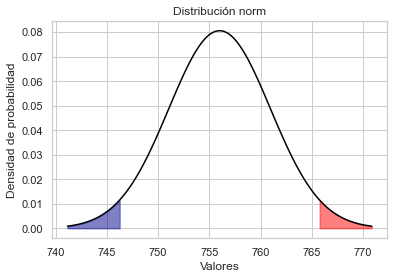

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Función para graficar la distribución
def plotDist(distrib, mean, sd, groups, type, col):
    x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
    y = norm.pdf(x, mean, sd)
    plt.plot(x, y, color="black")
    
    lower = groups[0]
    upper = groups[1]
    
    plt.fill_between(x, y, where=(x < lower), color=col[0], alpha=0.5)
    plt.fill_between(x, y, where=(x > upper), color=col[1], alpha=0.5)
    
    plt.xlabel("Valores")
    plt.ylabel("Densidad de probabilidad")
    plt.title("Distribución " + distrib)
    plt.show()

plotDist("norm", mean=756, sd=35/np.sqrt(50), groups=[746.29, 765.70], type="h", col=["darkblue", "red"])


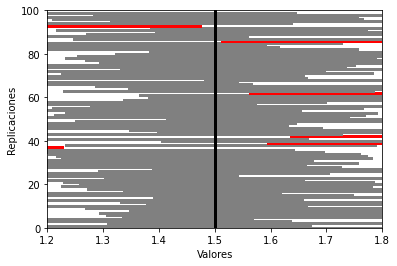

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(1012)

mu = 1.5
sigma = 1
alpha = 0.05

Población = np.random.normal(mu, sigma, 10**6)


def ICZ(x, sigma, alpha):
    n = len(x)
    mean_x = np.mean(x)
    z_value = norm.ppf(1 - alpha/2)
    lower = mean_x - z_value * sigma / np.sqrt(n)
    upper = mean_x + z_value * sigma / np.sqrt(n)
    return (lower, upper)

M = np.empty((2, 100))

def ICZ(x, sigma, alpha):
    n = len(x)
    mean_x = np.mean(x)
    z_value = norm.ppf(1 - alpha/2)
    lower = mean_x - z_value * sigma / np.sqrt(n)
    upper = mean_x + z_value * sigma / np.sqrt(n)
    return (lower, upper)

for i in range(100):
    sample_x = np.random.choice(Población, size=50, replace=True)
    M[:, i] = ICZ(sample_x, sigma, alpha)

plt.figure()
plt.plot([1.2, 1.8], [0, 100], 'w')  # Create an empty plot
for i in range(100):
    color = "grey"
    if (mu < M[0, i]) or (mu > M[1, i]):
        color = "red"
    plt.plot(M[:, i], [i, i], color, linewidth=3)
plt.axvline(mu, color="black", linewidth=3)
plt.xlabel("Valores")
plt.ylabel("Replicaciones")
plt.ylim(0, 100)
plt.xlim(1.2, 1.8)
plt.show()

De media, un  $\alpha 100\%$ de las veces, un intervalo de confianza del  $(1−\alpha)\times 100\%$   no contendrá el valor real del parámetro.

Por ejemplo, de media, un  $5\%$ de las veces un intervalo de confianza del  $95\%$ no contendrá el valor real del parámetro.






### Intervalo de confianza de muestra grande para una proporción poblacional $\pi$




Muchos experimentos de investigación o estudios muestrales tienen como objetivo la
estimación de la proporción de personas u objetos de un grupo grande, que posean cierta
característica. Veamos algunos ejemplos:
- La proporción de ventas que se puede esperar en un gran número de contactos de
clientes
- La proporción de semillas que germinan
- La proporción de votantes “probables” que planean votar para un candidato político particular


Cada uno es un ejemplo práctico del experimento binomial y el parámetro a estimarse es la proporción binomial $\pi$.
Cuando el tamaño muestral es grande, la proporción muestral,

$$p=\frac{x}{n}=\frac{\text{ Número total de éxitos}}{\text{ Número total de intentos}}$$


**UN INTERVALO DE CONFIANZA DE MUESTRA GRANDE $(1-\alpha)100\%$ PARA UNA PROPORCIÓN POBLACIONAL $\pi$**

$$p\pm Z_{1-\alpha/2}\sqrt{\frac{\pi(1-\pi)}{n}}$$
donde $Z_{1-\alpha/2}$ es el valor $Z$ correspondiente a un área $\alpha/2$ en la cola superior de una
distribución $Z$ normal estándar y

$n=$  tamaño muestral.  Como $\pi$ es incógnita, se estima con el uso de los estimadores puntuales $p$.  El tamaño muestral se considera grande cuando a aproximación normal a la distribución binomio es adecuada, es decir, cuando $np>5$ o $n(1-p)>5$

#### Ejemplo:

Una muestra aleatoria de 985 “probables” electores, o sea los que probablemente voten
en la próxima elección, fueron encuestados durante un maratón telefónico realizado por
el Partido Republicano. De ellos, 592 indicaron que tenían la intención de votar por la
candidata republicana. Construya un intervalo de confi anza de $90\%$ para $\pi$, la proporción
de electores probables de la población que tienen la intención de votar por la candidata
republicana. Con base en esta información, ¿se puede concluir que la candidata ganará
la elección?


### Ejercicios:




**1.** Debido a una variación en técnicas de laboratorio, impurezas en materiales y otros factores desconocidos, los resultados
de un experimento en un laboratorio de química no siempre darán la misma respuesta numérica. En un experimento de electrólisis, un grupo de estudiantes midió la cantidad de cobre precipitado de una solución saturada de sulfato de cobre en un periodo de 30 minutos.
Los $n= 30$ estudiantes calcularon una media muestral y desviación estándar igual a 0.145 y 0.0051 moles, respectivamente. Encuentre un intervalo de confianza de $90\%$ para la cantidad media de cobre precipitado de la solución en un periodo de 30 minutos.


**2.** ¿Tiene usted un iPod Nano o un Walkman Bean Sony? Éstas y otras marcas de reproductores MP3 están haciéndose cada vez más populares entre los jóvenes estadounidenses. Un estudio acerca de los iPod indicó que $54\%$ de los jóvenes entre 12 y 17 años de edad, $30\%$ de entre 18 y 34 años y $13\%$ de entre 35 y 54 años tienen reproductores MP3.  Suponga que estas tres estimaciones están basadas en muestras aleatorias de tamaños 400, 350 y 362, respectivamente.

> - Construya una estimación de intervalo de confianza de
$95\%$ para la proporción de personas entre 12 y 17 años
que tienen un reproductor MP3.
> - Construya una estimación de intervalo de confianza de
$95\%$ para la proporción de personas entre 18 y 34 años
que tienen un reproductor MP3.

**3.** El departamento de carnes de una cadena local de supermercados empaca
carne molida usando charolas de dos tamaños: una
diseñada para contener alrededor de 1 libra de carne
y otra que contiene aproximadamente 3 libras. Una  muestra aleatoria de 35 paquetes en las charolas más
pequeñas para carne produjo mediciones de peso con
un promedio de 1.01 libras y una desviación estándar
de 0.18 libras.

> -  Construya un intervalo de confianza de $99\%$ para el
peso promedio de todos los paquetes vendidos por esta
cadena de supermercados en las charolas de carne más
pequeñas.
> - ¿Qué significa la frase “99% de confianza”?
> - Suponga que el departamento de control de calidad
de esta cadena de supermercados tiene la intención de  que la cantidad de carne molida en las charolas
más pequeñas debe ser 1 libra en promedio. ¿El intervalo de confianza del inciso a debe ser del interés del departamento de control de calidad? Explique.

**4.** Los resultados de una encuesta
del Newsweek respecto a puntos de vista sobre el aborto
dados en el ejercicio 7.66 mostró que de n  1002
adultos, $39\%$ favorecieron la postura del “derecho a
la vida”, en tanto que $53\%$ estuvieron “a favor de la
elección libre”. La encuesta reportó un margen de error de más o menos $3\%$.
 > - Construya un intervalo de confianza de $90\%$ para la
proporción de adultos que están a favor de la postura
del “derecho a la vida”.
> - Construya un intervalo de confianza de $90\%$ para la
proporción de adultos que están “a favor de la elección
libre”.